## 无监督学习
* 发现数据本身的分布特点

#### 数据聚类　K-means
预先设定聚类个数，再不断更新聚类中心，多轮迭代后，使得所有数据点到其所属聚类中心距离的平方和趋于稳定．

In [16]:
#%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# 从sklearn.cluster中导入KMeans模型
from sklearn.cluster import KMeans
# 从sklearn导入度量函数库metrics
from sklearn import metrics

# 使用pandas分别读取训练数据与测试数据集
digits_train = pd.read_csv('data/optdigits_train.csv', header=None)
digits_test = pd.read_csv('data/optdigits_test.csv', header=None)


# 从训练与测试数据集上都分离出64维度的像素特征与1维度的数字目标
X_train = digits_train[np.arange(64)]
y_train = digits_train[64]

X_test = digits_test[np.arange(64)]
y_test = digits_test[64]


# 初始化KMeans模型，并设置聚类中心数量为10
kmeans = KMeans(n_clusters=10)
kmeans.fit(X_train)

# 逐条判断每个测试图像所属的聚类中心
y_pred = kmeans.predict(X_test)

# 使用ARI进行KMeans聚类性能评估
print(metrics.adjusted_rand_score(y_test, y_pred))

print(digits_train[64].unique())
digits_train.head()


0.6671867157826549
[0 7 4 6 2 5 8 1 9 3]


,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0,1,6,15,12,1,0,0,0,7,...,0,0,0,6,14,7,1,0,0,0
1,0,0,10,16,6,0,0,0,0,7,...,0,0,0,10,16,15,3,0,0,0
2,0,0,8,15,16,13,0,0,0,1,...,0,0,0,9,14,0,0,0,0,7
3,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,1,15,2,0,0,4
4,0,0,5,14,4,0,0,0,0,0,...,0,0,0,4,12,14,7,0,0,6


[0.48631679043065806, 0.6607902651976716, 0.5283201007241881, 0.4360668312414346, 0.21821949237217392]


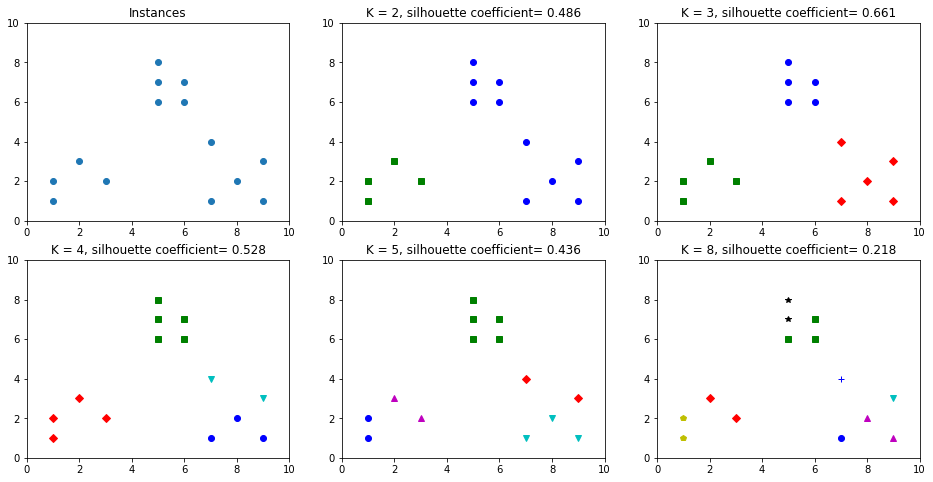

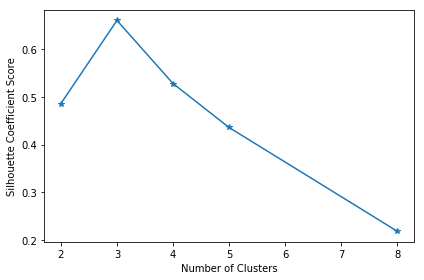

In [21]:
# 导入numpy。
import numpy as np
# 从sklearn.cluster中导入KMeans算法包。
from sklearn.cluster import KMeans
# 从sklearn.metrics导入silhouette_score用于计算轮廓系数。
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


# 初始化原始数据点。
x1 = np.array([1, 2, 3, 1, 5, 6, 5, 5, 6, 7, 8, 9, 7, 9])
x2 = np.array([1, 3, 2, 2, 8, 6, 7, 6, 7, 1, 2, 1, 4, 3])
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)


plt.figure(figsize=(16, 8))
# 在1号子图做出原始数据点阵的分布。
plt.subplot(2, 3, 1)
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.title('Instances')
plt.scatter(x1, x2)

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'b']
markers = ['o', 's', 'D', 'v', '^', 'p', '*', '+']

clusters = [2, 3, 4, 5, 8]
subplot_counter = 1
sc_scores = []
for t in clusters:
    subplot_counter += 1
    plt.subplot(2, 3, subplot_counter)
    kmeans_model = KMeans(n_clusters=t).fit(X)
    for i, l in enumerate(kmeans_model.labels_):
        plt.plot(x1[i], x2[i], color=colors[l], marker=markers[l], ls='None')
    plt.xlim([0, 10])
    plt.ylim([0, 10])
    # 轮廓系数评估　聚类算法
    sc_score = silhouette_score(X, kmeans_model.labels_, metric='euclidean')
    sc_scores.append(sc_score)

    # 绘制轮廓系数与不同类簇数量的直观显示图。
    plt.title('K = %s, silhouette coefficient= %0.03f' %(t, sc_score))

print(sc_scores)
# 绘制轮廓系数与不同类簇数量的关系曲线。
plt.figure()
plt.plot(clusters, sc_scores, '*-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient Score')

plt.tight_layout()
plt.show()

## 数据降维

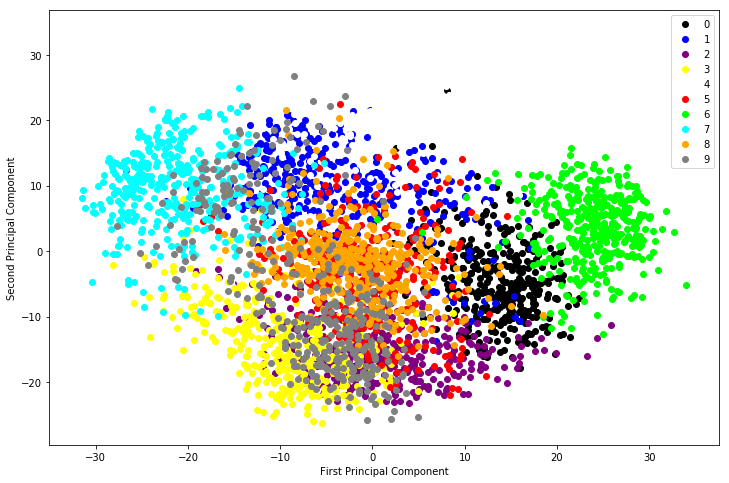

In [39]:
#%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 从sklearn.decomposition导入PCA。 
from sklearn.decomposition import PCA
# 从sklearn.cluster中导入KMeans模型
from sklearn.cluster import KMeans
# 从sklearn导入度量函数库metrics
from sklearn import metrics

# 使用pandas分别读取训练数据与测试数据集
digits_train = pd.read_csv('data/optdigits_train.csv', header=None)
digits_test = pd.read_csv('data/optdigits_test.csv', header=None)

# 分割训练数据的特征向量和标记。
X_digits = digits_train[np.arange(64)]
y_digits = digits_train[64]


# 初始化一个可以将高维度特征向量（64维）压缩至2个维度的PCA
estimator = PCA(n_components=2)
X_pca = estimator.fit_transform(X_digits)

def plot_pca_scatter():
    colors = ['black', 'blue', 'purple', 'yellow', 'white', 'red', 'lime', 'cyan', 'orange', 'gray']
    plt.figure(figsize=(12, 8))
    for i in range(len(colors)):
        px = X_pca[:, 0][y_digits.values == i]
        py = X_pca[:, 1][y_digits.values == i]
        plt.scatter(px, py, c=colors[i])
    
    plt.legend(np.arange(0,10).astype(str))
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.show()
    
plot_pca_scatter()

(3823, 3)


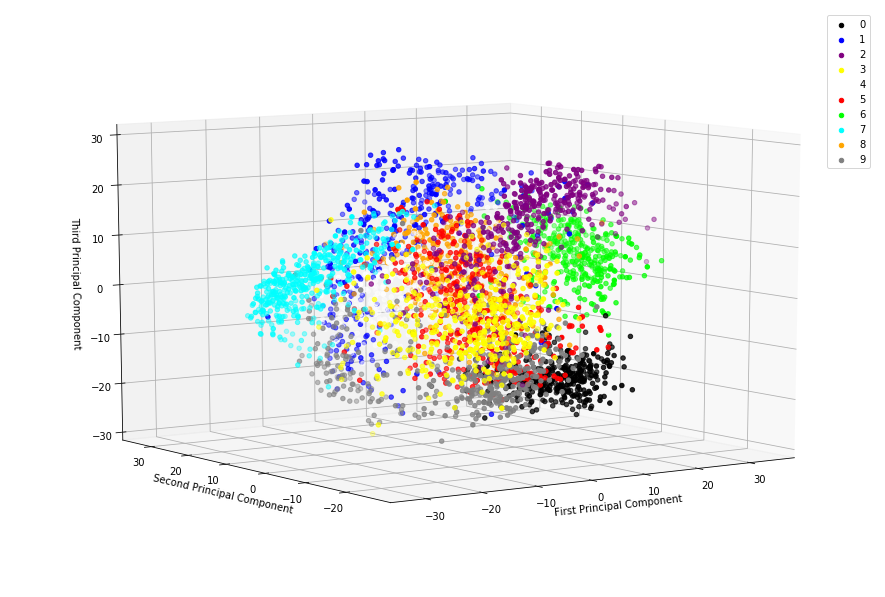

In [38]:
#%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 从sklearn.decomposition导入PCA。 
from sklearn.decomposition import PCA
# 从sklearn.cluster中导入KMeans模型
from sklearn.cluster import KMeans
# 从sklearn导入度量函数库metrics
from sklearn import metrics

# 使用pandas分别读取训练数据与测试数据集
digits_train = pd.read_csv('data/optdigits_train.csv', header=None)
digits_test = pd.read_csv('data/optdigits_test.csv', header=None)

# 分割训练数据的特征向量和标记。
X_digits = digits_train[np.arange(64)]
y_digits = digits_train[64]


# 初始化一个可以将高维度特征向量（64维）压缩至2个维度的PCA。 
estimator = PCA(n_components=3)
X_pca = estimator.fit_transform(X_digits)

print(X_pca.shape)

from mpl_toolkits.mplot3d import Axes3D 

def plot_pca_scatter():
    colors = ['black', 'blue', 'purple', 'yellow', 'white', 'red', 'lime', 'cyan', 'orange', 'gray']
    fig = plt.figure(figsize=(12, 8))
    ax = Axes3D(fig)
    for i in range(len(colors)):
        px = X_pca[:, 0][y_digits.values == i]
        py = X_pca[:, 1][y_digits.values == i]
        pz = X_pca[:, 2][y_digits.values == i]
        ax.scatter(px, py, pz, c=colors[i])
    
    ax.legend(np.arange(0,10).astype(str))
    ax.set_xlabel('First Principal Component')
    ax.set_ylabel('Second Principal Component')
    ax.set_zlabel('Third Principal Component')
    ax.view_init(elev=10,azim=235)
    plt.show()
    
plot_pca_scatter()

In [41]:
# 导入基于线性核的支持向量机分类器
from sklearn.svm import LinearSVC
# 从sklearn.metrics导入classification_report用于更加细致的分类性能分析
from sklearn.metrics import classification_report


# 使用pandas分别读取训练数据与测试数据集
digits_train = pd.read_csv('data/optdigits_train.csv', header=None)
digits_test = pd.read_csv('data/optdigits_test.csv', header=None)

# 对训练数据、测试数据进行特征向量（图片像素）与分类目标的分隔
X_train = digits_train[np.arange(64)]
y_train = digits_train[64]
X_test = digits_test[np.arange(64)]
y_test = digits_test[64]

print(X_test.shape)
# 使用默认配置初始化LinearSVC，对原始64维像素特征的训练数据进行建模，并在测试数据上做出预测，存储在y_predict中
svc = LinearSVC()
svc.fit(X_train, y_train)
y_predict = svc.predict(X_test)

# 使用PCA将原64维的图像数据压缩到20个维度
estimator = PCA(n_components=20)

# 利用训练特征决定（fit）20个正交维度的方向，并转化（transform）原训练特征
pca_X_train = estimator.fit_transform(X_train)
# 测试特征也按照上述的20个正交维度方向进行转化（transform）
pca_X_test = estimator.transform(X_test)

# 使用默认配置初始化LinearSVC，对压缩过后的20维特征的训练数据进行建模，并在测试数据上做出预测，存储在pca_y_predict中
pca_svc = LinearSVC()
pca_svc.fit(pca_X_train, y_train)
pca_y_predict = pca_svc.predict(pca_X_test)

# 对使用原始图像高维像素特征训练的支持向量机分类器的性能作出评估
print(svc.score(X_test, y_test))
print(classification_report(y_test, y_predict, target_names=np.arange(10).astype(str)))

# 对使用PCA压缩重建的低维图像特征训练的支持向量机分类器的性能作出评估
print(pca_svc.score(pca_X_test, y_test))
print(classification_report(y_test, pca_y_predict, target_names=np.arange(10).astype(str)))

(1797, 64)
0.9348914858096828
             precision    recall  f1-score   support

          0       0.99      0.98      0.98       178
          1       0.90      0.92      0.91       182
          2       0.97      0.99      0.98       177
          3       0.99      0.87      0.93       183
          4       0.95      0.97      0.96       181
          5       0.89      0.97      0.93       182
          6       0.99      0.98      0.99       181
          7       0.98      0.90      0.94       179
          8       0.88      0.86      0.87       174
          9       0.83      0.92      0.88       180

avg / total       0.94      0.93      0.94      1797

0.9215358931552587
             precision    recall  f1-score   support

          0       0.97      0.96      0.96       178
          1       0.86      0.86      0.86       182
          2       0.97      0.98      0.98       177
          3       0.97      0.90      0.93       183
          4       0.94      0.94      0.94    